In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.18.1


# IMPORT THE DATASET (THE DATASET HAVE COME IN KAGGLE)


In [9]:
data= pd.read_csv("C:\\Users\\asus\\emotion recognition\\data\\fer2013.csv")

In [10]:
# the all data of pixel columns the string data convert to numpy array numeric value like float and spilt
pixels=data['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))
# combine all array to single 2D array
X= np.stack(pixels,axis=0)

In [12]:
# Reshape into 48*48 grayscale  and normalize pixel value to better trainning
X= X.reshape(-1,48,48,1)/255.0

In [13]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
# using the one-hot encoding in categorical data
y=to_categorical(data['emotion'],num_classes=7)

In [15]:
# train and test and split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [16]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (28709, 48, 48, 1) (28709, 7)
Test shape: (7178, 48, 48, 1) (7178, 7)


# now i completed the the trainning and testing and data preprocesing 

# lets start the create the model

# Build CNN model 

In [26]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),   # ✅ correct
    epochs=50,
    batch_size=64
)


test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test accuracy:", test_acc)


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 106s 219ms/step - accuracy: 0.2522 - loss: 2.1210 - val_accuracy: 0.3045 - val_loss: 1.8820
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 105s 233ms/step - accuracy: 0.3632 - loss: 1.6153 - val_accuracy: 0.4108 - val_loss: 1.5235
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.4012 - loss: 1.5254 - val_accuracy: 0.4543 - val_loss: 1.4205
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 188ms/step - accuracy: 0.4370 - loss: 1.4496 - val_accuracy: 0.4266 - val_loss: 1.4456
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 188ms/step - accuracy: 0.4581 - loss: 1.3975 - val_accuracy: 0.5095 - val_loss: 1.2816
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.4765 - loss: 1.3612 - val_accuracy: 0.4863 - val_loss: 1.3103
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 144s 188ms/step - accuracy: 0.4932 - loss: 1.3166 - val_accuracy: 0.4440 - val_loss: 1.3996
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 137s 177ms/step - accuracy: 0.5072 - los

## Plot accuracy and loss curves to see if the model is learning well or overfitting.

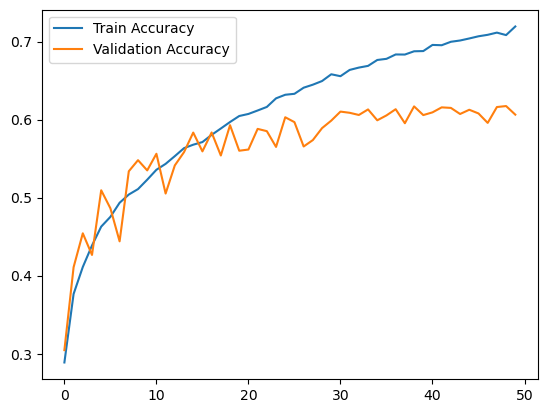

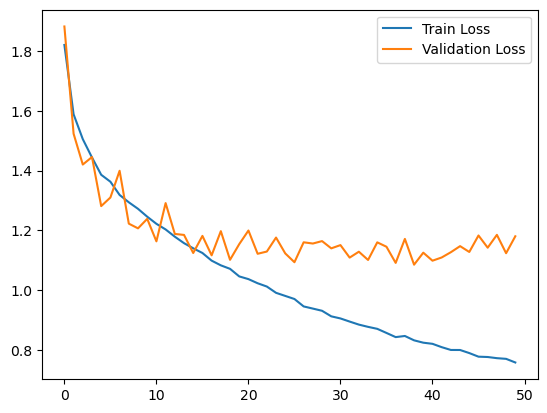

In [30]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


## Evaluate on test set

In [32]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Final Test Accuracy:", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6043 - loss: 1.1981
Final Test Accuracy: 0.6064363121986389


In [34]:
import numpy as np

# Pick one test sample
i = 55
sample = np.expand_dims(X_test[i], axis=0)
pred = model.predict(sample)

print("Predicted Emotion:", np.argmax(pred))
print("True Emotion:", np.argmax(y_test[i]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
Predicted Emotion: 3
True Emotion: 3


In [36]:
model.save("emotion_model.h5")


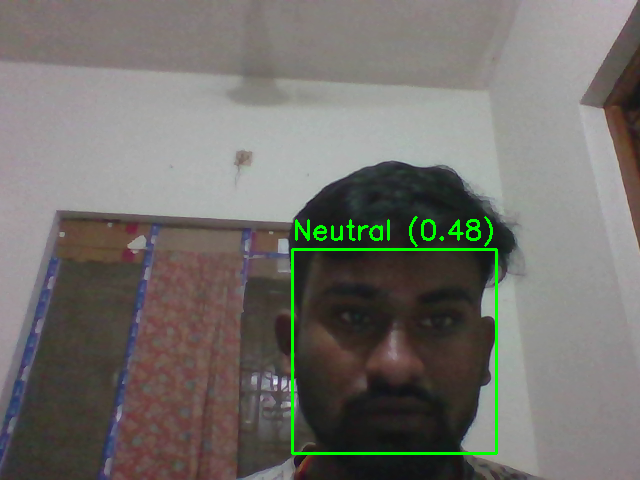

In [47]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, clear_output
from PIL import Image

# Load your trained model
model = load_model("emotion_model.h5")

# Emotion labels (adjust if your dataset is different)
emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

# Load face detector
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

try:
    while True:  # runs continuously until you stop
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)

        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray = cv2.resize(roi_gray, (48,48))
            roi = roi_gray.astype('float32')/255.0
            roi = np.expand_dims(roi, axis=-1)
            roi = np.expand_dims(roi, axis=0)

            preds = model.predict(roi, verbose=0)[0]
            label = emotion_labels[np.argmax(preds)]
            confidence = np.max(preds)

            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
            cv2.putText(frame, f"{label} ({confidence:.2f})", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

        # Convert BGR to RGB and display inline
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        display(Image.fromarray(img))
        
except KeyboardInterrupt:
    pass

cap.release()
